In [ ]:
## 1. supervised vs unupervised learning - MNIST dataset
# in this excerise we want to treat a supervised dataset (i.e the data has a label) as unsupervised
# we will use t-Distributed Stochastic Neighbour Embedding (t-SNE) to cluster the data
# https://towardsdatascience.com/t-distributed-stochastic-neighbor-embedding-t-sne-bb60ff109561
# as we have labels we can then see if these clusters show a pattern 

In [3]:
#import required modules
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numerical arrays
import pandas as pd # for df
import seaborn as sns # for plotting

from sklearn import datasets
from sklearn import manifold # scikit-learn for perfroming the t-SNE

%matplotlib inline

In [4]:
# fetch MNIST dataset (this comes with sklearn)
data = datasets.fetch_openml(
                        'mnist_784',
                        version=1,
                        return_X_y=True
) # here we find the dataset from sklearns datasets
pixel_values, targets = data # this creates an array of pixels (features) and targets (labels) form the data set
targets = targets.astype(int) # the targets are str so are converted to int

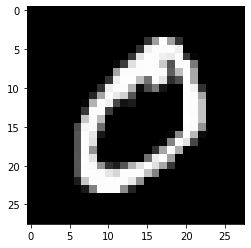

In [30]:
# visualize the data
pixel_values_np = np.asarray(pixel_values) # I could only get this to work by first converting the df to a np array
single_image = pixel_values_np[1, :].reshape(28, 28) # this calls the first row of data, reshape to 28x28 (in pixel_vlaues it is a 70000x784 as there are 70000 rows of data and the 28x28 pixel images flattern to 784)
plt.imshow(single_image, cmap='gray') #shows the data as an image

In [42]:
# create t-SNE tranformation
tsne = manifold.TSNE(n_components=2, random_state=42) # two componets are used as this is easy to visualize in a 2D setting
# n_components: dimension of the embedded space, this is the lower dimension that we want the high dimension data to be converted to
transformed_data = tsne.fit_transform(pixel_values_np[:3000, :])

In [37]:
# convert to dataframe
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int) # the targets are str so are converted to int

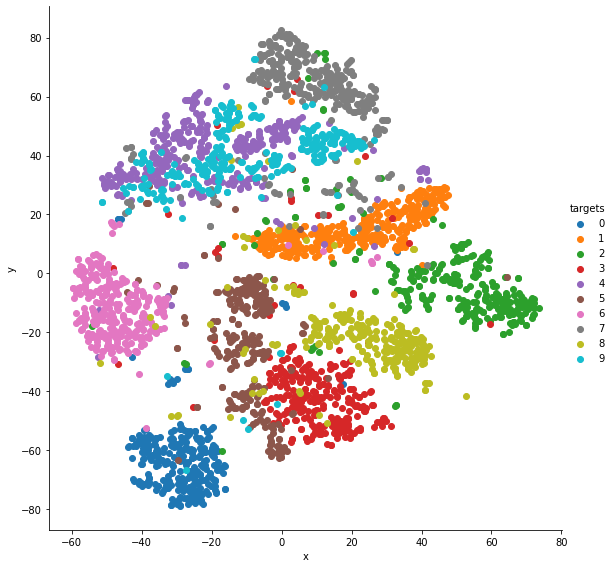

In [40]:
# plotting
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()